In [110]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex
import sympy
from sympy import S, Symbol, symbols, Function, integrate, diff, Curve, plot, plot_parametric, latex, solveset, Interval, Eq
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
import math
%matplotlib inline

## Занятие 11
## Математический анализ
## Применение интегралов для вычисления площади фигуры и длины дуги

### Задание 1
Вычислить площадь фигуры, ограниченной графиками функций $f = 2 + x^2$ и  $g = 2 - x^3$. Построить графики, найти точки пересечения, затем вычислить соответствующие интегралы.

<IPython.core.display.Latex object>

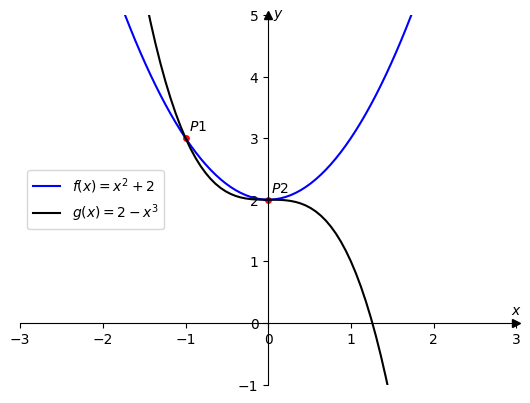

In [87]:
x = Symbol('x')

def f(x):
  return 2 + x**2

def g(x):
  return 2 - x**3

lst_roots = sorted([*solveset(f(x) - g(x), x, domain = S.Reals)])
X = np.linspace(-3, 3, 100)

ax = plt.gca()
ax.plot(X, f(X), color = "blue",  label = r"$f(x) = " + sympy.latex(f(x)) + r"$")
ax.plot(X, g(X), color = "black", label = r"$g(x) = " + sympy.latex(g(x)) + r"$")

for i in range(len(lst_roots)):
  x_cur = lst_roots[i]
  y_cur = f(lst_roots[i])
  ax.scatter(x_cur, y_cur, color = "red", s = 15)
  ax.annotate(f"$P{i + 1}$", xy = (x_cur, y_cur), xycoords='data',
                xytext = (x_cur + 0.04, y_cur + 0.12), textcoords = 'data',
              fontsize = 10)

x_lim = (-3,3)
y_lim = (-1, 5)
ax.legend(loc = "center left")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.0, 0.22)
ax.yaxis.set_label_coords(0.52, 0.980)

Int_f_1 = integrate(f(x), (x, lst_roots[0], lst_roots[1]))
Int_g_1 = integrate(g(x), (x, lst_roots[0], lst_roots[1]))
Int_ans_1 = sympy.Abs(Int_f_1 - Int_g_1)
display(Latex(fr"\text{{Площадь фигуры, ограниченной графиками f(x) и g(x) = }} {latex(Int_ans_1)}"))
print()

### Задача 2.
Вычислить площадь фигуры, ограниченной графиком функции $x = \cos^3(t)$, $y = \sin^3(t)$, $0 \le t \le 2\pi$.

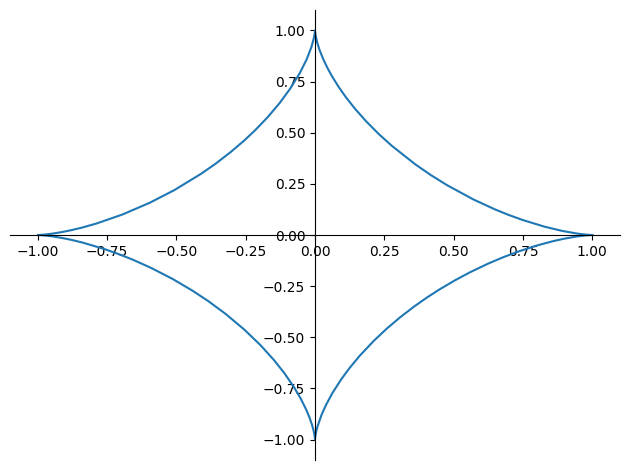

<IPython.core.display.Latex object>

In [60]:
t = Symbol('t')

def x_param(t):
  return sympy.cos(t)**3

def y_param(t):
  return sympy.sin(t)**3

plot_parametric((x_param(t), y_param(t)), (t, 0, 2 * sympy.pi))

left_lim = 0
right_lim = 2 * sympy.pi
if (x_param(left_lim) >= x_param(right_lim)):
  tmp = left_lim
  left_lim = right_lim
  right_lim = tmp


Int_2 = integrate((y_param(t) * x_param(t).diff(t)), (t, left_lim, right_lim))
display(Latex(fr"\text{{Площадь фигуры, ограниченной графиком параметрической функции = }} {latex(Int_2)}"))

### Задача 3.
Вычислить площадь фигуры, ограниченной графиком функции $r = \cos(2\phi)$, $-\frac{\pi}{4} \le \phi \le \frac{\pi}{4}$.

In [ ]:
phi = Symbol("phi")

def r(phi):
  return sympy.cos(2 * phi)

Int_3 = integrate(r(phi)**2 / 2, (phi, -S(sympy.pi)/4, S(sympy.pi)/4))
display(Latex(fr"\text{{Площадь фигуры, ограниченной графиком функции в полярных координатах = }} {latex(Int_3)}"))

### Задача 4.
Вычислить длину кривой, заданной уравнением $y^2 = x^3$ при $x$ от 1 до 3.

In [ ]:
def y(x):
  return x ** (S(3)/2)
Int_4 = integrate(sympy.sqrt(1 + (y(x).diff(x))**2), (x, 1, 3))
display(Latex(fr'\text{{Длинна кривой = }} {latex(sympy.simplify(Int_4))}'))

### Задача 5.
Вычислить длину кривой, заданной параметрически $x = \frac{3}{2}\cos^3 t $, $y = 3\sin^3 t$.

In [ ]:
def x_param(t):
  return (S(3)/2) * sympy.cos(t)**3

def y_param(t):
  return 3 * sympy.sin(t)**3

cur_parametric = Curve((x_param(t), y_param(t)), (t, 0, 2 * sympy.pi))
display(Latex(fr'\text{{Длинна кривой = }} {latex(cur_parametric.length)}'))

### Задача 6.
Вычислить длину кривой, заданной в полярных координатах
$r = \phi$, $\phi$ от 0 до $2\pi$. Результат вычислить приближенно до 3 знаков после запятой.

In [ ]:
def r(phi):
  return phi

Int_6 = integrate((r(phi)**2 + r(phi).diff(phi)**2)** S.Half, (phi, 0, 2 * sympy.pi)).evalf(5)
display(Latex(fr'\text{{Длинна кривой = }} {latex(Int_6)}'))

### Индивидуальное задание
Вычислить площадь фигуры, ограниченной графиками функций $f = 2\sin(x)$ и  $g = \cos(2x)$ на интервале  $[0, \pi]$. Построить графики, найти точки пересечения (выделить корни на интервале с помощью intersect и Interval), затем вычислить соответствующие интегралы.

Вариант №134

$$f(x)=3 \cos{\left(6 x \right)}$$
$$g(x)=6 \cos{\left(3 x \right)}$$

на интервале $[0;0.7 \pi]$


<IPython.core.display.Latex object>

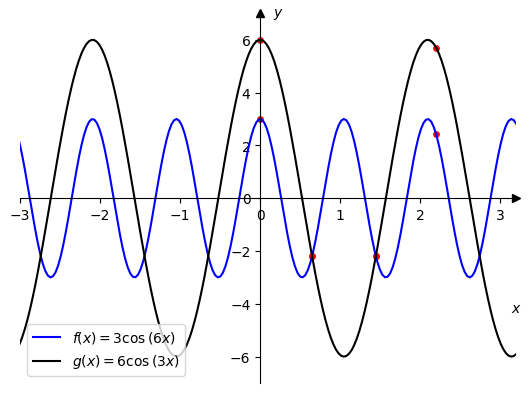

In [140]:
def f(x, lib = "sympy"):
  if (lib == "numpy"):
    return  3 * np.cos(6 * x)
  elif (lib == "sympy"):
    return 3 * sympy.cos(6 * x)
  else:
    display(Latex(fr"\text{{Wrong lib argument.}}"))

def g(x, lib = "sympy"):
  if (lib == "numpy"):
    return  6 * np.cos(3 * x)
  elif (lib == "sympy"):
    return 6 * sympy.cos(3 * x)
  else:
    display(Latex(fr"\text{{Wrong lib argument.}}"))

interval = sympy.Interval(0, 0.7 * sympy.pi)
lst_roots = [*solveset(f(x) - g(x), x, domain = interval)]
lst_roots.extend([0, (S(7)/10) * sympy.pi])
lst_roots.sort()

X = np.linspace(-3.2, 3.2, 200)

ax = plt.gca()
ax.plot(X, f(X, "numpy"), color = "blue", label = r"$f(x) = " + sympy.latex(f(x)) + r"$")
ax.plot(X, g(X, "numpy"), color = "black", label = r"$g(x) = " + sympy.latex(g(x)) + r"$")

for i in range(len(lst_roots)):
  x_cur = lst_roots[i]
  f_cur = f(x_cur)
  g_cur = g(x_cur)
  if (f_cur != x_cur):
    ax.scatter(x_cur, g_cur, color = "red", s = 15)
  ax.scatter(x_cur, f_cur, color = 'red', s = 15)


x_lim = (-3, 3.2)
y_lim = (-7, 7)
ax.legend(loc = "best")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)
ax.set(ylim = y_lim, xlim = x_lim)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$", rotation = 0)
ax.xaxis.set_label_coords(1.0, 0.22)
ax.yaxis.set_label_coords(0.52, 0.980)

Int_ans = 0
for i in range(len(lst_roots) - 1):
  x_1 = lst_roots[i]
  x_2 = lst_roots[i + 1]
  Int_f_cur = integrate(f(x), (x, x_1, x_2))
  Int_g_cur = integrate(g(x), (x, x_1, x_2))
  Int_ans += abs(Int_f_cur - Int_g_cur)
display(Latex(fr"\text{{Площадь фигуры, ограниченной графиками f(x) и g(x) = }} {latex(sympy.simplify(Int_ans)) }\approx {latex(Int_ans.evalf(4))}"))